# X Sentiment Analysis Using CNN

## Introduction
Sentiment analysis is a technique used to determine the emotional tone from remarks or comments that users of certain application either X, facebook, instagram or tiktok about a certain topic.

This remarks can have a positive tone, neutral tone and negative tone towards a certain audience.



## Business Understanding


### Background
The way individuals engage and communicate has changed dramatically as a result of the social media sites like X (previously Twitter) growing so quickly. These platforms are being used more and more as a gauge of public sentiment on a range of issues, including goods and services. Businesses frequently use social media to assess customer opinion and guide their marketing initiatives.

However, there are many obstacles in the way of gleaning valuable insights from social media data. The amount of content combined with its informal and frequently colloquial style makes it challenging for computers to comprehend and process. Slang, acronyms, and emoticons can all be used to make sentiment analysis more difficult.

Principal Difficulties in Sentiment Analysis of Social Media:

1. Informal Language: Slang, acronyms, and emoticons are examples of the informal language used in social media posts, which can make it challenging for computers to understand what is being said.

2. Ambiguity: Posts on social media are not exempt from the inherent ambiguity of human language. Depending on the context, one word or phrase can mean different things to different people.

3. Subjectivity: Personal prejudices, cultural disparities, and other elements can all have an impact on sentiment. It might be difficult for computers to fully represent the subtleties of human emotions.


### Problem statement
X or formerly known as twitter is a growing social media platform, that many of its users use to make their opinions based on the topic of discussion. These opinions might be negative, positive and neutral depending on how people perceive it. As a business, sometimes corporations tend to advertise their products on this social media platform in order to get public opinion regarding on the product been advertised.

Users of this platform write their opinions the way they want to and sometimes it is challenging to get useful data from the tweets because of the sheer number and informal style, which frequently includes slang, acronyms, and emoticons. Many corporations rely on using computers as the easiest and fastest way of retrieving useful data instead of human labor.

Sometimes the computer cannot comprehend the tweets because of their informal style and make it difficult to fetch useful data needed by the corporations. Another issue is that computers cannot differentiate between positive, negative or neutral tweets just based on input text alone as that is only perceived by humans alone. This leads to inadequate insights generated by corporations from public opinion to improve certain products or when advertising certain products.

### Objective
1. Develop a sentiment analysis model that uses natural preprocessing language(nlp) to preprocess and clean the tweets, and make it in a more structured format for sentiment analysis.

2. Use the sentiment analysis model that can accurately classify tweets into positive, negative and neutral sentiment categories.

3. Evaluate Performance: Measure the model's accuracy, precision, recall, and F1-score on a labeled dataset, and iteratively improve based on evaluation results.

### Conclusion

More advanced sentiment analysis methods must be developed due to the increasing complexity of social media data. Computers can be efficient and scalable, but they frequently have trouble capturing the subtleties of human emotion and language. Researchers and companies need to invest in cutting-edge algorithms and models that can comprehend the subjectivity, tone, and context of social media posts in order to get beyond these restrictions. Organizations may improve their marketing tactics, make better judgements, and obtain deeper insights into public opinion by developing their sentiment analysis capabilities.











## Data Understanding

### Import Libraries

In [77]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Embedding, Dropout, GlobalMaxPooling1D, Bidirectional, LSTM

In [2]:
!pip install datasets

### Loading the data

In [3]:
from datasets import load_dataset

ds = load_dataset("mteb/tweet_sentiment_extraction")

In [4]:
dataset = load_dataset("mteb/tweet_sentiment_extraction")

In [5]:
train_data = dataset['train']
# Convert the dataset to a DataFrame
train_df = pd.DataFrame(train_data)

train_df.head(20)

,id,text,label,label_text
0,cb774db0d1,"I`d have responded, if I were going",1,neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,0,negative
2,088c60f138,my boss is bullying me...,0,negative
3,9642c003ef,what interview! leave me alone,0,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",0,negative
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,1,neutral
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,2,positive
7,50e14c0bb8,Soooo high,1,neutral
8,e050245fbd,Both of you,1,neutral
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,2,positive


In [6]:
# checking the columns
train_df.columns

Index(['id', 'text', 'label', 'label_text'], dtype='object')

In [7]:
# size of the dataframe
train_df.shape

(27481, 4)

In [8]:
# preview a text
train_df['text'][1500]

'This wind is crampin` my style. I have a section of my yard that won`t get any water. I`d move the sprinkler, but it`s surrounded by mud.'

In [9]:
# value counts of the sentiments
train_df['label_text'].value_counts()

neutral     11118
positive     8582
negative     7781
Name: label_text, dtype: int64

In [10]:
# summary information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          27481 non-null  object
 1   text        27481 non-null  object
 2   label       27481 non-null  int64 
 3   label_text  27481 non-null  object
dtypes: int64(1), object(3)
memory usage: 858.9+ KB


### Handling Missing Values

We want to ensure there are no missing tweets or sentiment labels in the dataset before preprocessing.

In [11]:
# Checking for missing values
missing_values = train_df.isnull().sum()
if missing_values.sum() == 0:
    print('There are no missing values')
else:
    print('Check for the missing values')

There are no missing values


### Class Distribution

A bar plot showing the distribution of classes (negative, neutral, positive) can give us insight into whether our dataset is balanced or imbalanced.

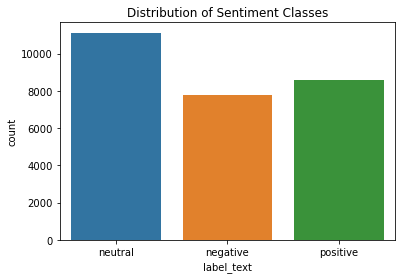

In [12]:
# Plot class distribution
sns.countplot(x='label_text', data=train_df)
plt.title('Distribution of Sentiment Classes')
plt.show()

It shows that the neutral class is the most common sentiment in our dataset, followed by negative and positive sentiments.

## Data Preparation

### Text Preprocessing

In [15]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NATALI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# display stopwords
print(stop_words)

{'that', 'itself', 'after', 'or', "haven't", 'no', 'hadn', 'hers', 'she', 'which', "don't", "you'll", 'as', 'further', 'll', 'has', 'own', 'theirs', 'once', "isn't", 'be', 'up', 'very', "shouldn't", 'then', 'did', 'both', 'ma', 'weren', 'were', 'doesn', "you'd", 'himself', "you're", 'below', 'because', 'into', 'is', "hadn't", 'before', 'should', 'down', 'few', 'in', 've', 're', 'on', 'by', 'do', 'and', 'haven', "needn't", 'had', 'am', 'this', "mustn't", 'me', 'can', 'm', 'who', 'mightn', "wasn't", 'until', 'why', 'most', 'ours', 'only', 'are', 'myself', 'the', 'yourselves', 'a', 'so', 'him', 'having', 'doing', "mightn't", 'between', "that'll", 'didn', 'hasn', 'nor', 'will', 'shan', 'my', 'your', 'how', 'again', 'ourselves', 'i', "she's", 'mustn', 'his', 'couldn', 'isn', 't', "couldn't", 'against', 'to', 'any', 'won', "shan't", 'does', 'was', 'not', 'whom', 'd', 'been', 'here', 'for', 'themselves', 'you', "didn't", 'when', 'all', 'from', 'out', 'of', 'some', 'each', 'them', 'those', 'he

In [17]:
def preprocess_text(text) -> str:
  """
  Function to clean and preprocess the text
  """
  # lower case
  text = text.lower()
  # remove html tags
  text = re.sub(r'<.*?>', '', text)
  # remove non-alphabetical
  text = re.sub(r'[^a-z\s]', '', text)
  # remove stop words
  text = ' '.join([word for word in text.split() if word not in stop_words])
  # remove mentions
  text = re.sub(r'@\w+', '', text)
  # remove html links
  text = re.sub(r'http\S+|www.\S+', '', text)
  # replace elongated words (e.g., "sooooo" -> "so")
  text = re.sub(r'\b(\w*?)([aeiou])\2{2,}(\w*?)\b', r'\1\2\3', text) 
  # remove possessives (e.g., "ann's" -> "ann")
  text = re.sub(r"\b(\w+)'s\b", r'\1', text)

  return text



In [18]:
# apply to the text column
train_df['text'] = train_df['text'].apply(preprocess_text)

In [19]:
# preview a text after preprocessing
train_df['text'][1500]

'wind crampin style section yard wont get water id move sprinkler surrounded mud'

### Tokenization and Padding

In [20]:
# tokenize the 'text' column
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['text'])
word_index = tokenizer.word_index
print(f'Vocabulary size: {len(word_index)}')

Vocabulary size: 26062


In [21]:
# Convert texts to sequences
X = tokenizer.texts_to_sequences(train_df['text'])

In [22]:
# Defining a max length for truncating the sequences.
max_len = 500
X = pad_sequences(X, maxlen=max_len)

In [170]:
# Extract the target labels (sentiment) from the 'label' column in the dataset
# This will be used as the dependent variable.
y = train_df['label'].values


### Distribution of Sequence Lengths

After padding, we check the distribution of the lengths of sequences (the number of tokens per sample).This helps ensure that our padding or truncation strategy is appropriate.

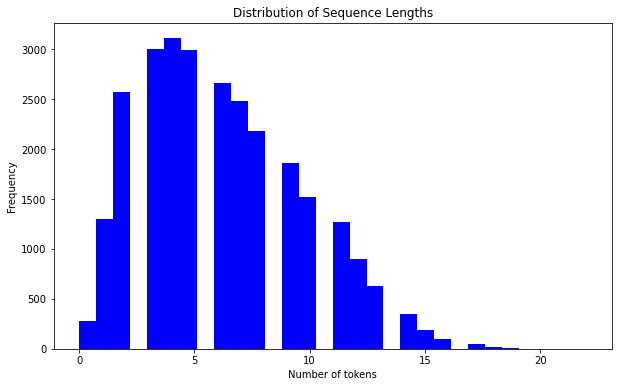

In [24]:
# Get the length of each sequence (before padding)
seq_lengths = [len(seq) for seq in tokenizer.texts_to_sequences(train_df['text'])]

# Plot distribution of sequence lengths
plt.figure(figsize=(10,6))
plt.hist(seq_lengths, bins=30, color='blue')
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Number of tokens')
plt.ylabel('Frequency')
plt.show()

The distribution plot of sequence lengths shows that the majority of text samples have between 2 and 10 tokens, with a peak around 4-6 tokens. The distribution tail suggests that some samples have longer sequences, though fewer of them exceed 15 tokens.

### Loading the test data

In [11]:
test_data = dataset['test']
# Convert the dataset to a DataFrame
test_df = pd.DataFrame(test_data)

test_df.head()

,id,text,label,label_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,1,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,2,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",0,negative
3,01082688c6,happy bday!,2,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,2,positive


In [12]:
#checking the columns 
test_df.columns

Index(['id', 'text', 'label', 'label_text'], dtype='object')

In [13]:
# size of the dataframe
test_df.shape

(3534, 4)

In [14]:
# preview a text
test_df['text'][1600]

'At anthony`s for prom.'

In [32]:
# value counts of the sentiments
test_df['label_text'].value_counts()

neutral     1430
positive    1103
negative    1001
Name: label_text, dtype: int64

In [33]:
# summary information
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          3534 non-null   object
 1   text        3534 non-null   object
 2   label       3534 non-null   int64 
 3   label_text  3534 non-null   object
dtypes: int64(1), object(3)
memory usage: 110.6+ KB


### Handling Missing Values

We want to ensure there are no missing tweets or sentiment labels in the dataset before preprocessing.

In [34]:
# Checking for missing values
missing_values1 = test_df.isnull().sum()
if missing_values1.sum() == 0:
    print('There are no missing values')
else:
    print('Check for the missing values')

There are no missing values


### Class Distribution test data

A bar plot showing the distribution of classes (negative, neutral, positive) can give us insight into whether our dataset is balanced or imbalanced.



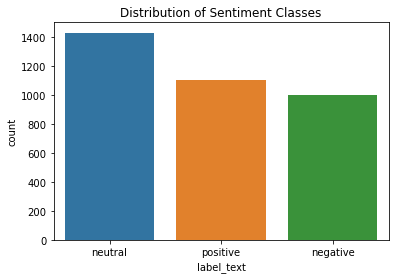

In [35]:
# Plot class distribution
sns.countplot(x='label_text', data=test_df)
plt.title('Distribution of Sentiment Classes')
plt.show()

It shows that the neutral class is the most common sentiment in our dataset, followed by negative and positive sentiments.

## Data Preparation

### Text Preprocessing

In [25]:
# apply to the test text column
test_df['text'] = test_df['text'].apply(preprocess_text)

In [26]:
# preview a text after preprocessing
test_df['text'][1700]

'so hungry right shouldve eaten wedding'

### Tokenization and Padding

In [27]:
# tokenize the 'text' column
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(test_df['text'])
word_index = tokenizer.word_index
print(f'Vocabulary size: {len(word_index)}')

Vocabulary size: 6954


In [44]:
# Convert texts to sequences
X_test_sequences = tokenizer.texts_to_sequences(test_df['text'])

In [45]:
# Defining a max length for truncating the sequences.
max_len = 500
X_test = pad_sequences(X_test_sequences, maxlen=max_len)

In [30]:
# Extract the target labels (sentiment) from the 'label' column in the dataset
# This will be used as the dependent variable.
y_test = test_df['label'].values

### Distribution of Sequence Lengths
After padding, we check the distribution of the lengths of sequences (the number of tokens per sample).This helps ensure that our padding or truncation strategy is appropriate.


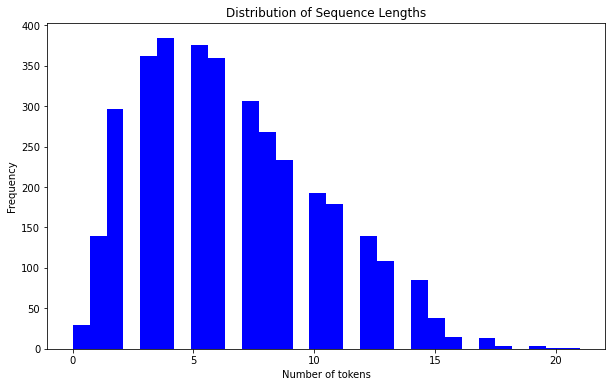

In [31]:
# Get the length of each sequence (before padding)
seq_lengths = [len(seq) for seq in tokenizer.texts_to_sequences(test_df['text'])]

# Plot distribution of sequence lengths
plt.figure(figsize=(10,6))
plt.hist(seq_lengths, bins=30, color='blue')
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Number of tokens')
plt.ylabel('Frequency')
plt.show()

The distribution plot of sequence lengths shows that the majority of text samples have between 2 and 10 tokens, with a peak around 4-6 tokens. The distribution tail suggests that some samples have longer sequences, though fewer of them exceed 15 tokens.

### CNN Modeling

#### Model 1

In [124]:
#set parameters
num_classes = 3

#instatiate sequential
model3 = Sequential()

# embedding layer to learn word embeddings
model3.add(Embedding(input_dim=5001, output_dim=128, input_length=max_len))

# 1D convolutional layer
model3.add(Conv1D(filters=64, kernel_size=5, activation='relu'))

# GlobalMaxPooling to reduce dimensionality
model3.add(MaxPooling1D(pool_size=2))

#hidden layers
model3.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model3.add(MaxPooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes, activation='softmax')) #use of multi class


In [133]:
#compile the model
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Training model 1

In [134]:
results_3 =model3.fit(X, y, epochs=5, batch_size=64, validation_data=(X_test,y_test))

Epoch 1/5
430/430 [==============================] - 93s 216ms/step - loss: 0.6783 - accuracy: 0.7300 - val_loss: 1.4611 - val_accuracy: 0.3591
Epoch 2/5
430/430 [==============================] - 91s 211ms/step - loss: 0.5721 - accuracy: 0.7764 - val_loss: 1.7555 - val_accuracy: 0.3582
Epoch 3/5
430/430 [==============================] - 94s 219ms/step - loss: 0.4605 - accuracy: 0.8307 - val_loss: 2.0976 - val_accuracy: 0.3602
Epoch 4/5
430/430 [==============================] - 91s 212ms/step - loss: 0.3495 - accuracy: 0.8790 - val_loss: 2.4957 - val_accuracy: 0.3591
Epoch 5/5
430/430 [==============================] - 92s 213ms/step - loss: 0.2706 - accuracy: 0.9099 - val_loss: 3.0579 - val_accuracy: 0.3698


In [217]:
print(results_3.history)

{'loss': [0.6782533526420593, 0.5720938444137573, 0.4605437219142914, 0.34948763251304626, 0.270579069852829], 'accuracy': [0.7299588918685913, 0.7764273285865784, 0.8307194113731384, 0.8789709210395813, 0.9099013805389404], 'val_loss': [1.461084008216858, 1.755535364151001, 2.0975868701934814, 2.4957058429718018, 3.057917356491089], 'val_accuracy': [0.3590832054615021, 0.3582342863082886, 0.36021506786346436, 0.3590832054615021, 0.36983588337898254]}


#### Visualizing loss and accuracy with comparison with validation accuracy and loss

In [125]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

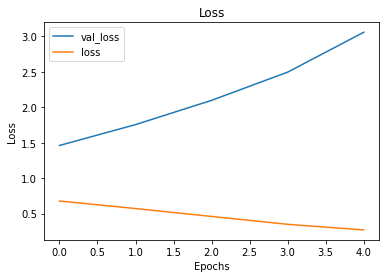

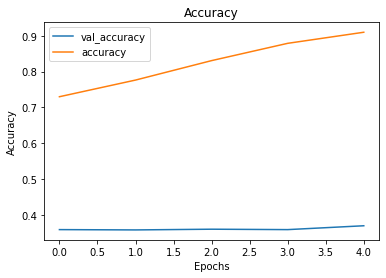

In [135]:
visualize_training_results(results_3)

From the visualizations, it shows that the model is overfitting as the accuracy keeps on increasing as the validation accuracy remains static.

#### Evaluating Model 1

In [136]:
#get the loss and accuracy of the test data
loss, accuracy = model3.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')

111/111 [==============================] - 3s 31ms/step - loss: 3.0579 - accuracy: 0.3698
Test Loss: 3.0579
Test Accuracy: 36.98%


To conclude, we can say that model 1 is not fit to be used to make predictions on the test data. This is because model 1 is overfitting based on the high accuracy on the training data and the low accuracy on the test data. 

#### Model 2

In [93]:
#reshape X to be 3 dimensional
X_train = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [94]:
#change y to be categorical to the 3 classes
y_train= to_categorical(y, num_classes=3)

In [106]:
y_test_shaped = to_categorical(y_test, num_classes=3)

In [102]:
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [111]:
model = Sequential()

#convolutional layer 
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# Max Pooling Layer
model.add(MaxPooling1D(pool_size=4))

# Flatten Output
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))

#Regularization
model.add(Dropout(0.35))

# Output Layer
model.add(Dense(3, activation='softmax'))

# Compiling the Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [112]:
# Training the model
history= model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_test_reshaped, y_test_shaped))

Epoch 1/5
430/430 [==============================] - 16s 36ms/step - loss: 1.5610 - accuracy: 0.3836 - val_loss: 1.0887 - val_accuracy: 0.4044
Epoch 2/5
430/430 [==============================] - 18s 41ms/step - loss: 1.0904 - accuracy: 0.3986 - val_loss: 1.0882 - val_accuracy: 0.3998
Epoch 3/5
430/430 [==============================] - 19s 43ms/step - loss: 1.0881 - accuracy: 0.4043 - val_loss: 1.0868 - val_accuracy: 0.4044
Epoch 4/5
430/430 [==============================] - 19s 44ms/step - loss: 1.0878 - accuracy: 0.4042 - val_loss: 1.0874 - val_accuracy: 0.4046
Epoch 5/5
430/430 [==============================] - 19s 43ms/step - loss: 1.0870 - accuracy: 0.4052 - val_loss: 1.0870 - val_accuracy: 0.4046


#### Visualizing loss and accuracy with comparison with validation accuracy and loss

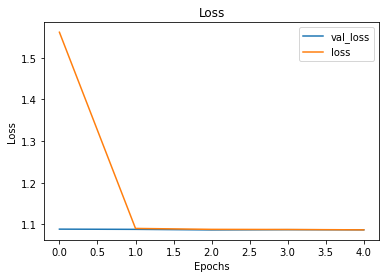

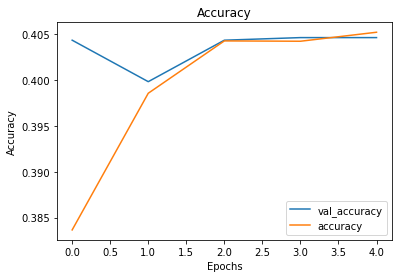

In [131]:
visualize_training_results(history)

Decreasing Validation Loss: During the training process, there is a constant decrease in the validation loss. This is encouraging since it shows that the model is becoming more effective with data that hasn't been seen yet.

Reducing Training Loss: As would be predicted throughout training, there is a reduction in training loss as well. The model appears to be effectively learning the fundamental patterns in the data and generalizing, based on the trend of both training and validation loss declining.

Growing Validation Accuracy: Throughout the training phase, the validation accuracy keeps rising. This is encouraging since it shows that the model is becoming more effective with data that hasn't been seen yet.

Decreasing Training Accuracy: Following a high, the training accuracy is now declining. This could indicate that the model is beginning to overfit the training set, picking up on its quirks rather than broad patterns.

In [113]:
#get the loss and accuracy of the test data
loss, accuracy = model.evaluate(X_test_reshaped, y_test_shaped)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')

111/111 [==============================] - 1s 5ms/step - loss: 1.0870 - accuracy: 0.4046
Test Loss: 1.0870
Test Accuracy: 40.46%


Model 2 is performing better than model 1 in terms of test accuracy and test loss on the test data 

#### Model 3

In [90]:
# Create the model
model2 = Sequential()
# Embedding layer to learn word embeddings
model2.add(Embedding(input_dim=5001, output_dim=128, input_length=max_len))

# 1D convolutional layer
model2.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model2.add(Dropout(0.5))  # Dropout layer to prevent overfitting

# Bidirectional LSTM for capturing sequence context
model2.add(Bidirectional(LSTM(64, return_sequences=True)))
model2.add(Dropout(0.5))

# GlobalMaxPooling to reduce dimensionality
model2.add(GlobalMaxPooling1D())

# Fully connected layers
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))  # Dropout for further regularization
model2.add(Dense(3, activation='softmax'))  # Output layer for multi-class classification

# Compile the model with sparse categorical crossentropy
model2.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])




In [89]:
results_4 = model2.fit(X, y, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
430/430 [==============================] - 541s 1s/step - loss: 1.0817 - accuracy: 0.4150 - val_loss: 1.0905 - val_accuracy: 0.3984
Epoch 2/5
430/430 [==============================] - 871s 2s/step - loss: 0.9063 - accuracy: 0.5664 - val_loss: 1.1413 - val_accuracy: 0.3721
Epoch 3/5
430/430 [==============================] - 558s 1s/step - loss: 0.7640 - accuracy: 0.6733 - val_loss: 1.1755 - val_accuracy: 0.3690
Epoch 4/5
430/430 [==============================] - 546s 1s/step - loss: 0.6973 - accuracy: 0.7185 - val_loss: 1.1926 - val_accuracy: 0.3735
Epoch 5/5
430/430 [==============================] - 537s 1s/step - loss: 0.6575 - accuracy: 0.7423 - val_loss: 1.1997 - val_accuracy: 0.3795


#### Visualizing loss and accuracy with comparison with validation accuracy and loss

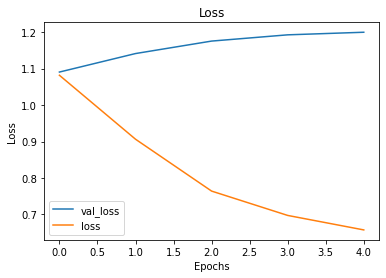

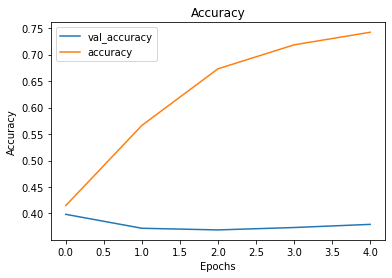

In [132]:
visualize_training_results(results_4)

Growing Validation Loss: Throughout the training process, the validation loss keeps rising. This is a clear sign that overfitting is occurring. The model is not able to generalise to previously unknown data since it is learning the training set too well.

Reducing Training Loss: During training, it is to be expected that the training loss will decrease. The model may not be becoming better at handling fresh data, though, if the declining trend of the training loss is not matched by a declining validation loss.

Growing Validation Accuracy: Throughout the training phase, the validation accuracy keeps rising. This is encouraging since it shows that the model is becoming more effective with data that hasn't been seen yet.

Decreasing Training Accuracy: Following a high, the training accuracy is now declining. This could indicate that the model is beginning to overfit the training set, picking up on its quirks rather than broad trends.



In [92]:
#get the loss and accuracy of the test data
loss, accuracy = model2.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')

111/111 [==============================] - 14s 130ms/step - loss: 1.0977 - accuracy: 0.4044
Test Loss: 1.0977
Test Accuracy: 40.44%


With comparison with the other 2 models, model 3 is performing better than model in terms of evaluating the test data but slightly poorly than model 2. It although has a higher training accuracy compared to model 2

### Making prediction on custom content
- Ater comparing the 3 models, model 3 was decided to be the final model to be used on predictions on the test data.

In [213]:
## Make Sentiment Prediction
def user_tweet():
  tweet = input('Please Type your tweet: ')
  return tweet

def predict_sentiment():
  tweet = user_tweet()

# preprocess the input review
  tweet = preprocess_text(tweet)
  print("Preprocessed tweet:", tweet)

#tokenize and pad the input
  sequence = tokenizer.texts_to_sequences([tweet])
  padded_sequence = pad_sequences(sequence, maxlen=max_len)
 
# make prediction
  prediction = model2.predict(padded_sequence)[0][0]
 
# interpret the prediction
  if prediction < 0.5:
    return 'Positive'
  else:
    return 'Negative'

In [216]:
predict_sentiment()

Preprocessed tweet: us though


'Positive'

In conclusion, our model was able to classify positive tweets from negatives and vice versa. This shows that our model given an input text can be able to classify positive and negative tweets.